In [ ]:
pip install flask_sqlalchemy

In [ ]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
import io
import json
import numpy as np
from os import getenv
import pandas as pd
import pickle
from sklearn.neighbors import KDTree

In [ ]:
df = pd.read_csv('./merged_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,artist_name,track_id,track_name,popularity
0,0.0,0.01020,0.833,204600,0.434,0.0219,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1.0,Mask Off,Future,NaN,NaN,NaN,NaN
1,NaN,0.00582,0.743,238373,0.339,0.0000,1,0.0812,-7.678,1,0.4090,203.927,4.0,0.118,NaN,NaN,NaN,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",15.0
2,NaN,0.02440,0.846,214800,0.557,0.0000,8,0.2860,-7.259,1,0.4570,159.009,4.0,0.371,NaN,NaN,NaN,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.0
3,NaN,0.02500,0.603,138913,0.723,0.0000,9,0.0824,-5.890,0,0.0454,114.966,4.0,0.382,NaN,NaN,NaN,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,56.0
4,NaN,0.02940,0.800,125381,0.579,0.9120,5,0.0994,-12.118,0,0.0701,123.003,4.0,0.641,NaN,NaN,NaN,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.0


In [ ]:
df.shape

(130327, 21)

In [ ]:
features = df.columns.tolist()

In [ ]:
remove_list = ['artist_name', 'track_id', 'track_name', 'duration_ms', 'popularity' ]

In [ ]:
for feature in remove_list:
  features.remove(feature)

In [ ]:
features

['Unnamed: 0',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target',
 'song_title',
 'artist']

In [ ]:
features = ['valence','speechiness','liveness','instrumentalness',
            'energy','danceability','acousticness']

In [ ]:
from sklearn.neighbors import NearestNeighbors
song_features = df[features]
nn = NearestNeighbors(n_neighbors=30)
nn.fit(song_features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                 radius=1.0)

In [ ]:
track_id = request.get_json(force=True)

In [ ]:
track_id = d
for i in range(len(track_id)):
    print(track_id[i].upper())

VALENCE
SPEECHINESS
LIVENESS
INSTRUMENTALNESS
ENERGY
DANCEABILITY
ACOUSTICNESS


In [ ]:
for column in df:
  print(df[column])

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
130322    NaN
130323    NaN
130324    NaN
130325    NaN
130326    NaN
Name: Unnamed: 0, Length: 130327, dtype: float64
0         0.01020
1         0.00582
2         0.02440
3         0.02500
4         0.02940
           ...   
130322    0.00678
130323    0.91800
130324    0.33000
130325    0.00790
130326    0.54900
Name: acousticness, Length: 130327, dtype: float64
0         0.833
1         0.743
2         0.846
3         0.603
4         0.800
          ...  
130322    0.601
130323    0.387
130324    0.717
130325    0.772
130326    0.715
Name: danceability, Length: 130327, dtype: float64
0         204600
1         238373
2         214800
3         138913
4         125381
           ...  
130322    190539
130323    194583
130324    139191
130325    180013
130326    145827
Name: duration_ms, Length: 130327, dtype: int64
0         0.434
1         0.339
2         0.557
3         0.723
4         0.579
      

In [ ]:
def track_df(track_id):

  df = pd.DataFrame(columns=[['acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target', 'song_title', 'artist', 'artist_name', 'track_id',
       'track_name', 'popularity']])

In [ ]:
df.sort_values(by=['acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target', 'song_title', 'artist', 'artist_name', 'track_id',
       'track_name', 'popularity'], ascending=False, na_position='first')

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,artist_name,track_id,track_name,popularity
89631,NaN,0.996,0.929,155552,0.079800,0.998,3,0.1180,-22.362,1,0.1680,135.189,5.0,0.4700,NaN,NaN,NaN,White Noise Sleep Sounds,0Qe5lxn9UL0bvS8QjDlS8u,Binaural Mids,0.0
87723,NaN,0.996,0.894,106742,0.011500,0.973,1,0.1120,-37.289,1,0.0944,143.995,4.0,0.1040,NaN,NaN,NaN,Binaural Beats Brain Waves Isochronic Tones Br...,0GduGQNiSMTKyKOf65ZpKZ,Sine Oscillation,0.0
40202,NaN,0.996,0.852,152158,0.085000,1.000,0,0.1150,-20.343,1,0.0992,119.913,4.0,0.0945,NaN,NaN,NaN,Lucid Dreaming World-Collective Unconscious Mind,4spKvfQgQXRrTMetWtMhmx,Brownian Binaural Bliss,0.0
86489,NaN,0.996,0.824,300000,0.212000,0.973,1,0.1120,-31.840,1,0.1220,150.016,3.0,0.0491,NaN,NaN,NaN,Binaural Beats Sleep,1s6XmJUIPxw4yuvNCB4sgl,Ambient Peaceful Sleeping (Theta Waves) - Loop...,11.0
31557,NaN,0.996,0.766,140135,0.114000,0.930,6,0.0965,-13.766,0,0.0601,111.179,3.0,0.1280,NaN,NaN,NaN,Image Sounds,4p4uOZxbkRQCzl2McIkcNL,Night Bar Music,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52905,NaN,0.000,0.000,69666,0.000019,0.000,0,0.0000,-15.289,1,0.0000,0.000,0.0,0.0000,NaN,NaN,NaN,Looped Fan Sleep Noise,1cElVGJGhFuHbWpeRTlZYf,Pink Noise Rain for Sleep (No Fade Noise),31.0
86460,NaN,0.000,0.000,65918,0.000020,0.973,1,0.2450,-23.560,1,0.0000,0.000,0.0,0.0000,NaN,NaN,NaN,Baby Shushing,4g2EnpMWpwvBH40p6eCvPB,"Brown Noise for Babies (Looped, No Fade)",27.0
102882,NaN,0.000,0.000,34923,0.000000,0.000,0,0.0000,-60.000,0,0.0000,0.000,0.0,0.0000,NaN,NaN,NaN,Spencer Wymetalek,2m1ThHoDeAULinkfzASSqg,Resolve,56.0
107906,NaN,0.000,0.000,32576,0.935000,0.973,0,0.1020,-16.025,1,0.0000,0.000,0.0,0.0000,NaN,NaN,NaN,Gyronillan,3z8zDqvJdz8rkd7xN6FpW3,Robots,2.0


In [ ]:
df.sort_values(by=['track_id'], ascending=False, na_position='first')

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,artist_name,track_id,track_name,popularity
0,0.0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.2860,1.0,Mask Off,Future,NaN,NaN,NaN,NaN
59459,NaN,0.061700,0.608,263475,0.583,0.000031,9,0.1190,-7.926,0,0.0578,84.977,4.0,0.4080,NaN,NaN,NaN,6058,7zzi9vwI9Oxv738nSig19o,Four & Seven,35.0
74586,NaN,0.116000,0.586,301241,0.750,0.000000,11,0.1860,-5.353,0,0.0639,145.001,4.0,0.3340,NaN,NaN,NaN,Apollo,7zzXNuz1OBFhRHiKWFod6o,Sanctuary,35.0
49347,NaN,0.001320,0.516,211200,0.964,0.698000,11,0.7960,-1.656,1,0.0635,150.035,4.0,0.3760,NaN,NaN,NaN,Oliverse,7zyzxDwgCam5DYP3ddWMjw,Get 2 Me,40.0
89976,NaN,0.003320,0.744,234998,0.941,0.764000,7,0.2380,-6.710,1,0.0559,132.068,4.0,0.5980,NaN,NaN,NaN,TB FRANK & BAUSTEIN,7zytEVADjb1aEwYsCwlr8z,I Didn't,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128023,NaN,0.046900,0.830,207827,0.653,0.000000,1,0.1120,-5.298,1,0.1850,123.032,4.0,0.2280,NaN,NaN,NaN,Young Dolph,002QT7AS6h1LAF5dla8D92,Still Smell Like It,49.0
58029,NaN,0.426000,0.850,134514,0.784,0.000011,5,0.1760,-6.794,1,0.1840,126.931,3.0,0.8440,NaN,NaN,NaN,Panchito Arredondo,000v2QpqP2NmikGmSkLlCZ,Legado Del 20 (En Vivo),21.0
92185,NaN,0.000035,0.399,336100,0.898,0.306000,4,0.2190,-10.859,0,0.0743,137.949,4.0,0.0529,NaN,NaN,NaN,RAM,000TqGTOAZjAIFU6SjmFmc,Northern Star (ASOT 895),23.0
13232,NaN,0.058300,0.679,190203,0.770,0.000000,0,0.0825,-3.537,1,0.1900,161.721,4.0,0.8390,NaN,NaN,NaN,Jordan Sandhu,000RDCYioLteXcutOjeweY,Teeje Week,52.0


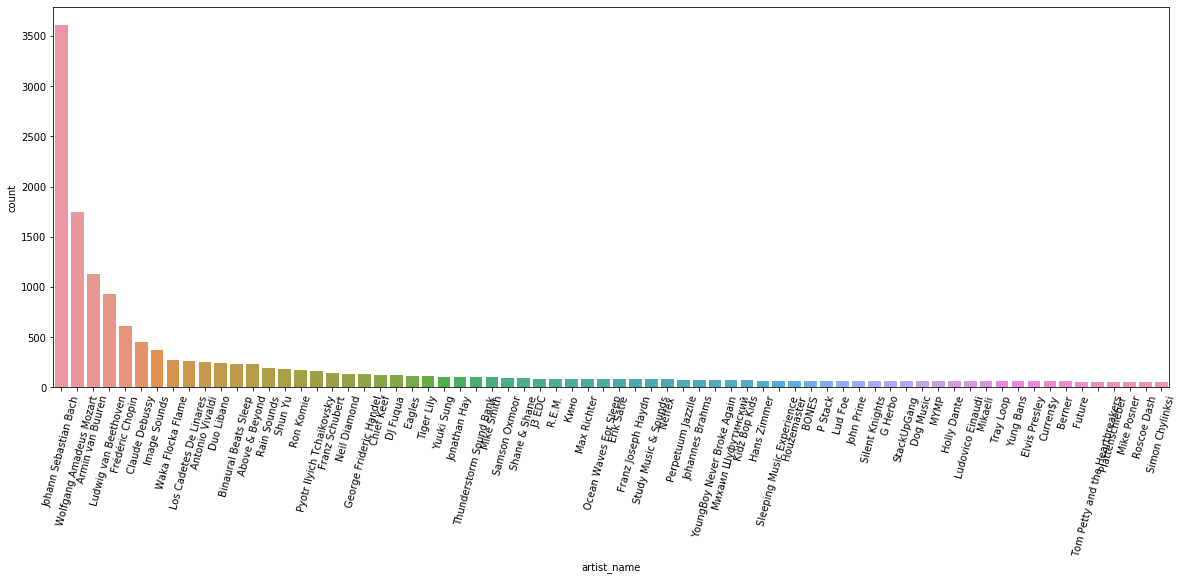

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'artist_name', data = df, order=df['artist_name'].value_counts().iloc[:70].index)
plt.xticks(rotation=75)
plt.show()

In [ ]:
df.columns.values

array(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target', 'song_title', 'artist', 'artist_name', 'track_id',
       'track_name', 'popularity'], dtype=object)